In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
CLUSTER_NAME: str = 'NGC 188'

In [3]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

In [4]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
sim2 = Simbad()
n_obj = sim2.query_bibobj('2015ApJ...814..163G')

In [6]:
bss_lit = n_obj.to_pandas()

In [7]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1


In [8]:
def get_gaia_dr3(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'EDR3' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia EDR3 ', ''))
    except:
        return None

In [9]:
def get_gaia_dr2(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'DR2' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia DR2 ', ''))
    except:
        return None

In [10]:
bss_lit['EDR3 id'] = np.vectorize(get_gaia_dr3)(bss_lit['MAIN_ID'].values)
bss_lit['DR2 id'] = np.vectorize(get_gaia_dr2)(bss_lit['MAIN_ID'].values)

In [11]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [12]:
coords = SkyCoord(ra=bss_lit.RA, dec=bss_lit.DEC, unit=(u.hourangle, u.deg), frame=ICRS)

In [13]:
bss_lit.RA = coords.ra.value
bss_lit.DEC = coords.dec.value
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,8.700021,85.540943,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [14]:
len(bss_lit.dropna(subset=['EDR3 id']))

22

In [15]:
bss_lit[pd.isnull(bss_lit['EDR3 id'])].head(10)

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
12,NGC 188,11.800000,85.243333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
24,NGC 2682,132.845833,11.813333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
25,M 30,325.092167,-23.179861,6,6,100.0,100.0,90,C,O,2010AJ....140.1830G,1,None,None


In [16]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [17]:
def get_cross_match(ra, dec, df):
    dist = u.arcsec.to(u.deg)
    a = df[np.isclose(ra, df.ra, dist) & np.isclose(dec, df.dec, dist)]
    try:
        return a['source_id'].values[0]
    except:
        return None

In [18]:
cross_matched_lit = bss_lit.apply(lambda x: get_cross_match(x['RA'], x['DEC'], sources), axis=1)
bss_lit['Gaia EDR3'] = cross_matched_lit

In [19]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [20]:
in_bss_candidates = np.in1d(bss_lit['Gaia EDR3'].values,
                            bss_candidates['source_id'].values)
bss_lit['in_bss'] = in_bss_candidates

In [21]:
bss_lit = pd.merge(left=bss_lit, right=sources, left_on='Gaia EDR3', right_on='source_id',
                   suffixes=('_lit', '_src'))

In [22]:
in_cluster = np.in1d(bss_lit['Gaia EDR3'].values,
                     clustered['source_id'].values)

In [23]:
bss_lit['in_cluster'] = in_cluster
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,in_cluster
0,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.571064,0.001893,3.302747,0.092027,0.005883,True
1,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,...,0.156612,0.098295,0.058156,0.037522,0.718240,0.001535,2.342432,0.080358,-0.000019,False
2,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.705798,0.003497,4.056418,0.124364,0.008074,True
3,NGC 188 3151,10.527558,85.279800,14,14,0.0126,0.0119,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.616632,0.001233,2.377883,0.054560,0.005897,True
4,NGC 188 2046,10.586150,85.260976,14,14,0.0103,0.0093,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.584572,0.000663,1.529322,0.043625,0.005892,True


In [24]:
missed_bss = bss_lit[~bss_lit.in_bss]

In [25]:
len(missed_bss)

7

In [26]:
missed_bss.parallax_over_error

1     27.022552
2     17.460733
7     15.048694
15    11.926151
16    14.467278
17    15.087319
20    51.153877
Name: parallax_over_error, dtype: float64

/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


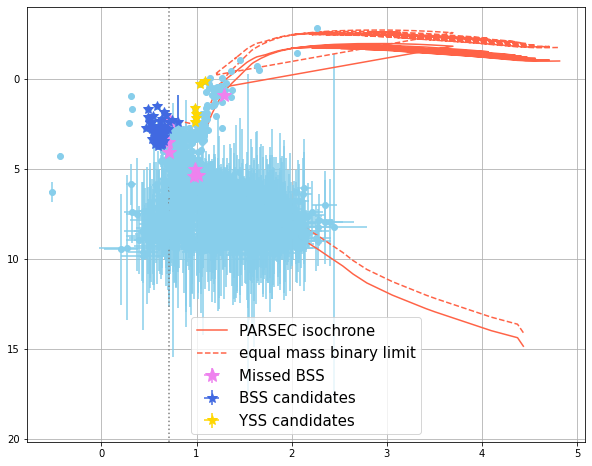

In [27]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.errorbar(clustered['BP-RP'], clustered['G_abs'],
             xerr=clustered['BP-RP_error'], yerr=clustered['G_abs_error'],
             color='skyblue', fmt='o')
plt.errorbar(missed_bss['BP-RP'], missed_bss['G_abs'],
             xerr=missed_bss['BP-RP_error'], yerr=missed_bss['G_abs_error'],
             color='violet', fmt='*', zorder=2, markersize=15.,
             label='Missed BSS')
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.grid()

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.show();

In [28]:
not_clustered = missed_bss[~missed_bss.in_cluster & (missed_bss.G_abs<3.5)]

In [29]:
not_clustered.parallax_over_error

1    27.022552
Name: parallax_over_error, dtype: float64

In [30]:
not_clustered.parallax

1    0.435717
Name: parallax, dtype: float64

In [31]:
not_clustered.pmra

1   -1.845753
Name: pmra, dtype: float64

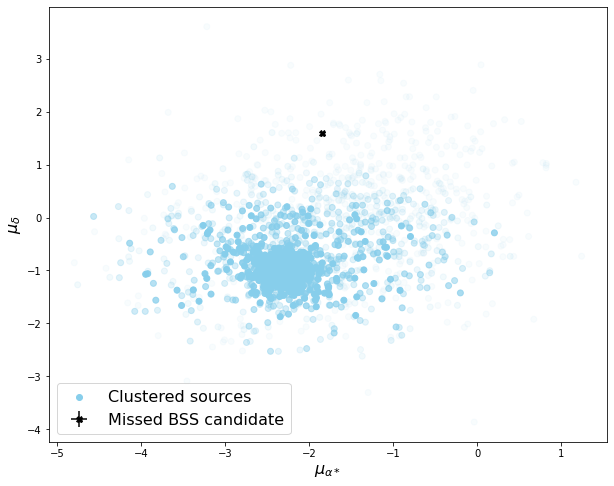

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered.pmra, clustered.pmdec, zorder=1, color='skyblue',
            alpha=clustered.occurences,
            label='Clustered sources')
plt.errorbar(not_clustered.pmra, not_clustered.pmdec,
             xerr=not_clustered.pmra_error, yerr=not_clustered.pmdec_error,
             fmt='X', zorder=2, color='black',
             label='Missed BSS candidate')
plt.gca().set_xlabel('$\mu_{\\alpha*}$', fontsize=16)
plt.gca().set_ylabel('$\mu_\delta$', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = [1];

In [33]:
bss_candidates = pd.concat([bss_candidates,
                           clustered[np.isclose(clustered['BP-RP'], 0.6, 1e-2) & np.isclose(clustered['G_abs'], 3.75, .1)],
                           clustered[(clustered['BP-RP']<=0.66) & (clustered['G_abs']<=3.7)]])

In [34]:
yss_candidates = pd.concat([yss_candidates,
                            clustered[np.isclose(clustered['BP-RP'], 1.075, 1e-2) & np.isclose(clustered['G_abs'], 2.13, .01)]])

In [35]:
TO_COLOR = np.min(isochrone[:, 0])

In [36]:
yss_candidates = yss_candidates[yss_candidates['BP-RP']<1.25]

In [37]:
yss_candidates = yss_candidates[~(np.isclose(yss_candidates['BP-RP'], 1.07, .01))]

In [38]:
bss_candidates = bss_candidates[~((bss_candidates['BP-RP']>0.7) & (bss_candidates['G_abs']>2.75) |
                                  (bss_candidates['BP-RP']<0.35))]

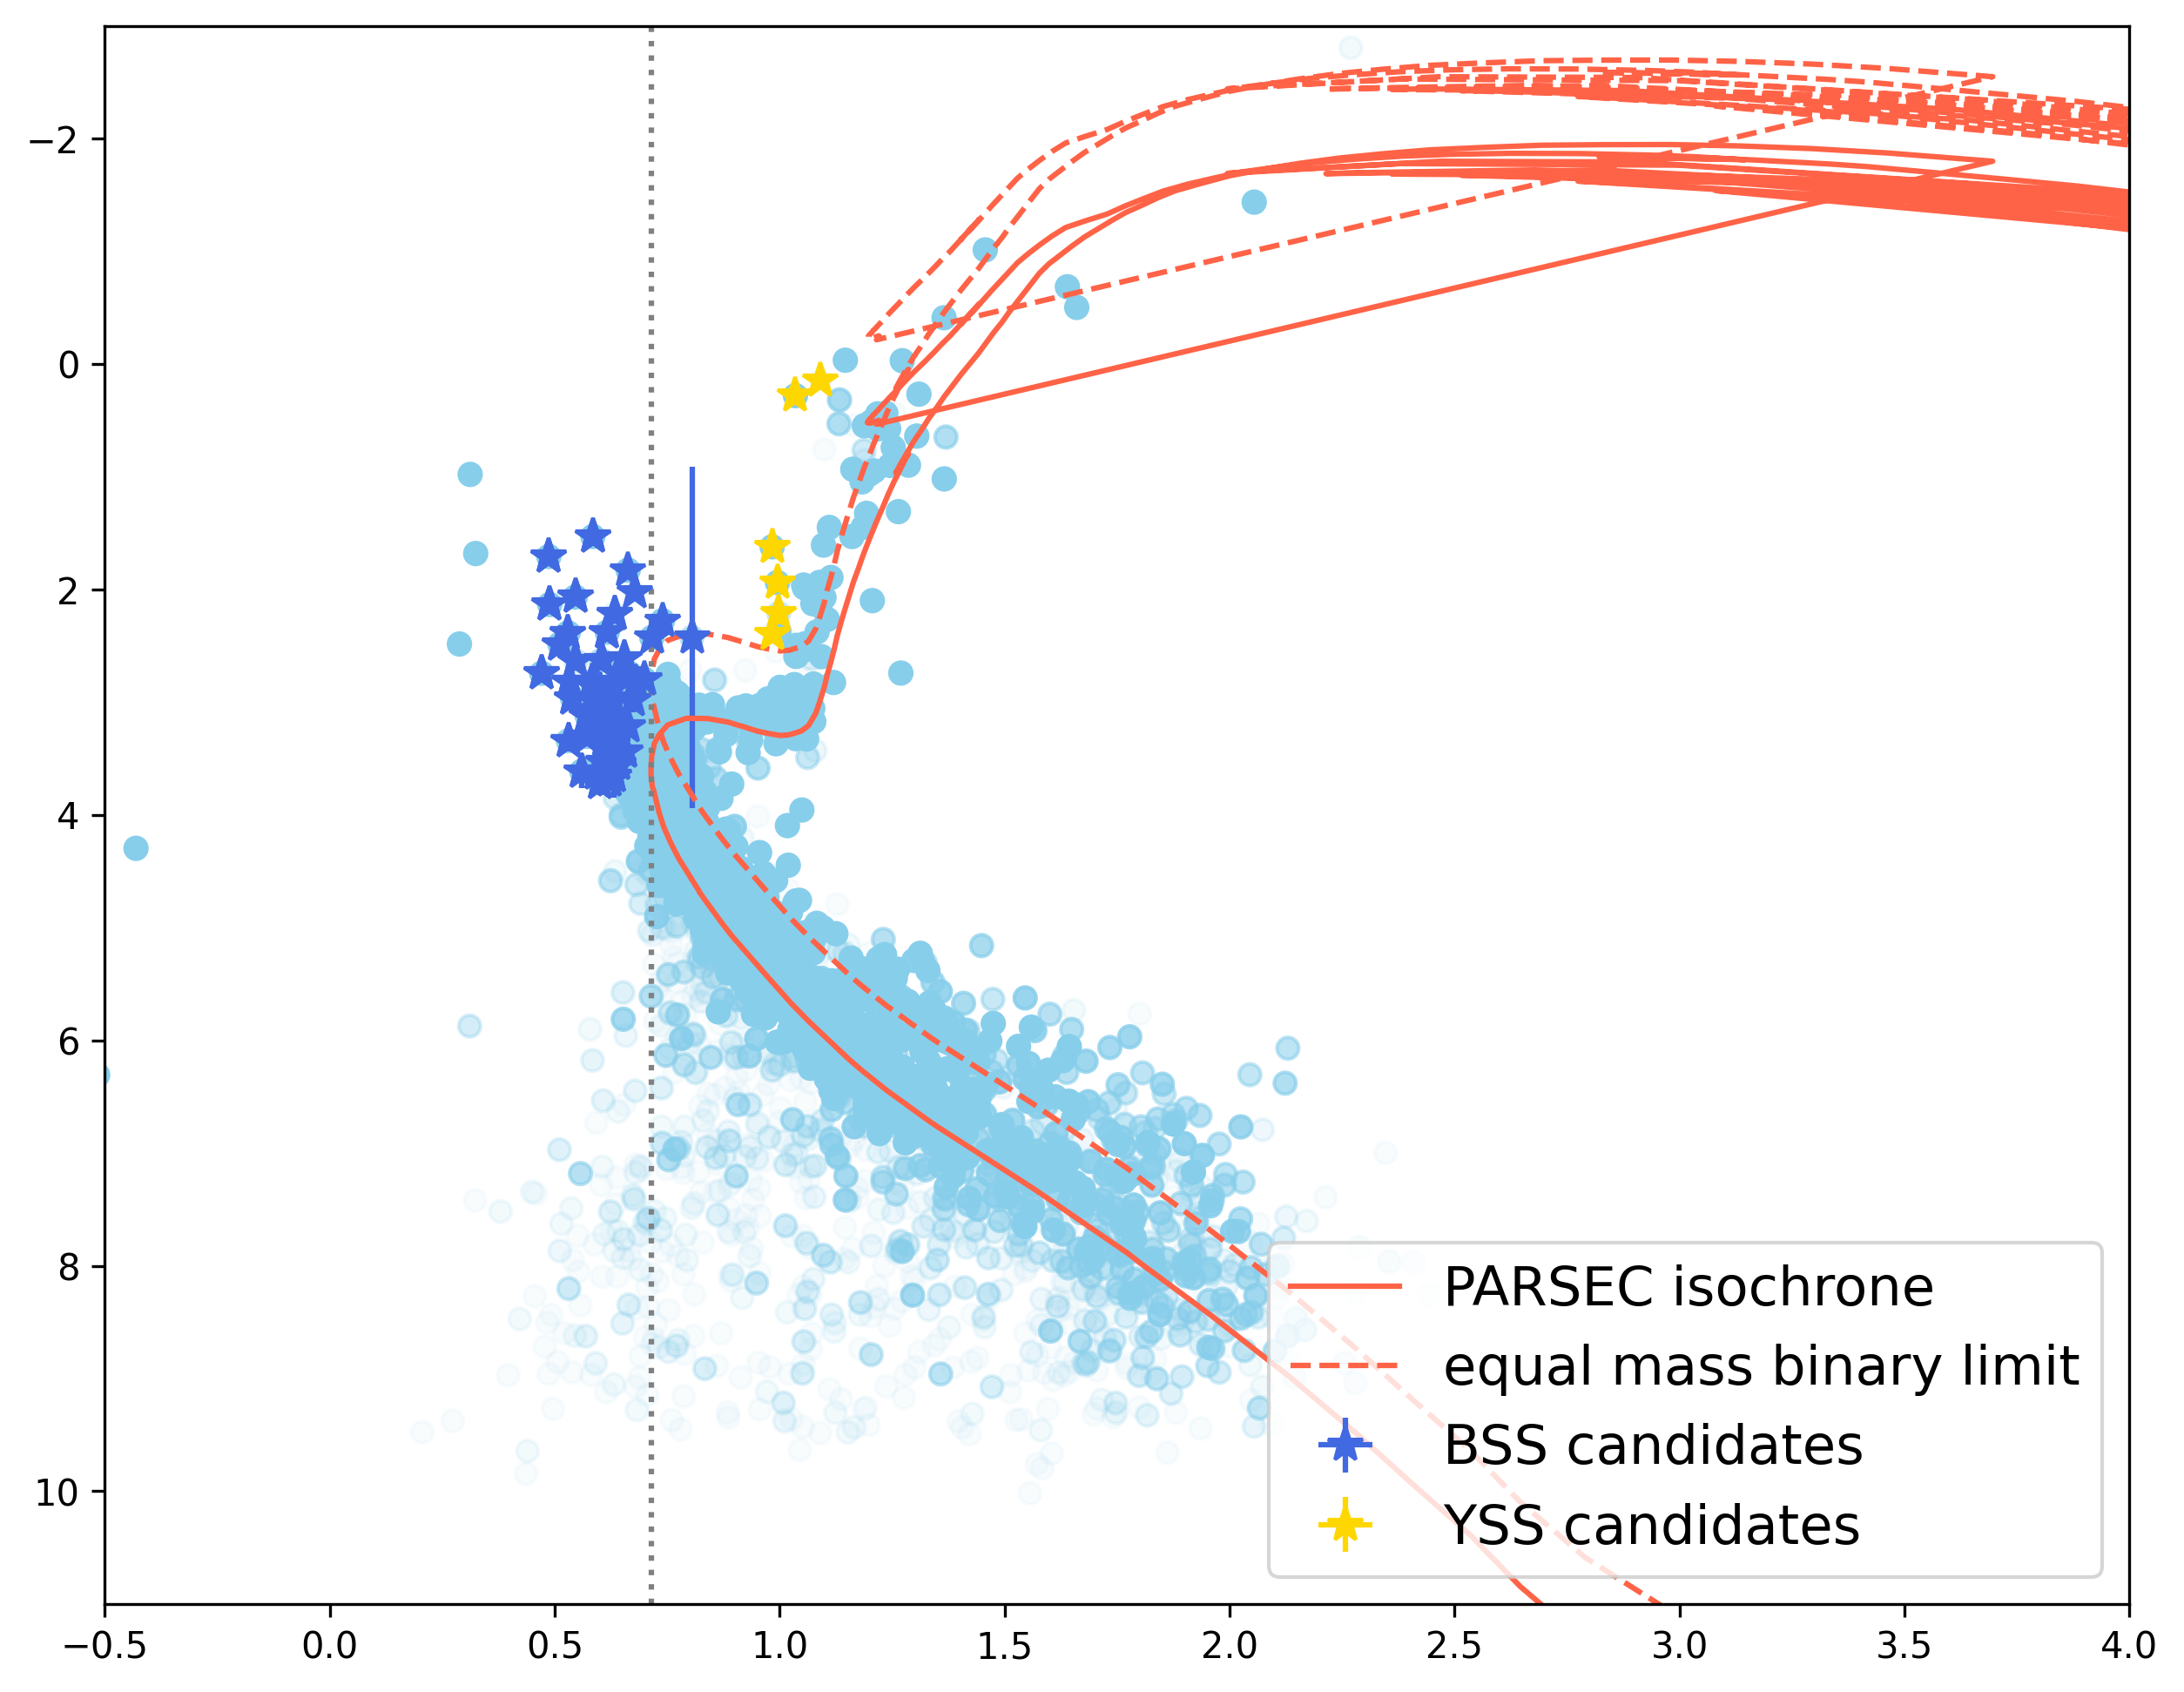

In [39]:
plt.figure(figsize=(10, 8), dpi=300)
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.gca().set_xlim(-.5, 4.);
plt.gca().set_ylim(11., -3.);

# BSS variability

In [40]:
bss_candidates = add_colors_and_abs_mag(bss_candidates).drop_duplicates(subset=['source_id'])

In [41]:
bss_candidates.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
0,0.0,0.0,33080,1636148068921376768,Gaia DR3 573548974933750144,573548974933750144,146137968,2016.0,9.880612,0.016126,...,0.159929,0.103187,0.587271,0.001416,2.855228,0.075992,0.010949,12,0.9,-1.0
1,1.0,2.0,37820,1636148068921376768,Gaia DR3 573738468889035264,573738468889035264,135807148,2016.0,13.928628,0.015846,...,0.203546,0.131328,0.640486,0.001370,2.739530,0.070370,0.015451,12,1.0,-1.0
2,2.0,3.0,42623,1636148068921376768,Gaia DR3 573937617933289856,573937617933289856,442857150,2016.0,12.523486,0.015359,...,0.189007,0.121948,0.680570,0.001866,2.828010,0.069148,0.014377,12,1.0,-1.0
3,3.0,4.0,42703,1636148068921376768,Gaia DR3 573938305128033920,573938305128033920,1315389913,2016.0,12.227328,0.020073,...,0.101062,0.065206,0.602583,0.001626,3.267815,0.077564,0.003517,12,1.0,-1.0
4,4.0,6.0,42785,1636148068921376768,Gaia DR3 573939404639640704,573939404639640704,65868889,2016.0,13.107909,0.010876,...,0.145390,0.093806,0.662986,0.000996,1.828611,0.047085,0.006618,12,1.0,-1.0


In [42]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [72]:
bss_var[['ra', 'dec']]

,ra,dec
23,10.849436,85.342409


http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40303836&Name=NGC%20%20%20188%20%203135&submit=submit

In [43]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [44]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573944283722429952,false,false,false,true,false,false,false,false,false,false,false


In [45]:
vari_short_timescale([573944283722429952])

INFO: Query finished. [astroquery.utils.tap.core]


,solution_id,source_id,amplitude_estimate,number_of_fov_transits,mean_of_fov_abbe_values,variogram_num_points,variogram_char_timescales,variogram_values,frequency
0,375316653866487564,573944283722429952,0.070808,45,1.00579,1,(0.176),(0.0023709204660254096),32.39746


In [46]:
np.any(bss_candidates.non_single_star)

False

In [73]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess', 'occurences', 'ra', 'dec']]

,source_id,has_epoch_photometry,ruwe,excess,occurences,ra,dec
5,573939954395446016,False,1.496976,0.004702,1.0,12.264081,85.257001
17,573942943692668416,False,1.410349,0.008893,1.0,11.805922,85.277745
27,573968198100312704,False,12.960780,0.066137,0.5,11.544925,85.407860


http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40303283&Name=NGC%20%20%20188%20%202119&submit=submit

http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40303133&Name=NGC%20%20%20188%20%201032&submit=submit

In [48]:
np.any(bss_candidates.has_epoch_rv)

False

In [49]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude[['source_id', 'radial_velocity', 'rv_amplitude_robust', 'radial_velocity_error']]

,source_id,radial_velocity,rv_amplitude_robust,radial_velocity_error


In [50]:
np.abs(bss_rv_amplitude.rv_amplitude_robust)>=6*bss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [51]:
bss_rv_amplitude.parallax_over_error

Series([], Name: parallax_over_error, dtype: float64)

In [52]:
bss_rv_amplitude.ruwe

Series([], Name: ruwe, dtype: float64)

In [53]:
bss_rv_amplitude.G_abs

Series([], Name: G_abs, dtype: float64)

In [54]:
bss_rv_amplitude['BP-RP']

Series([], Name: BP-RP, dtype: float64)

In [55]:
for _, bss in bss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

573944283722429952: 10.849435637836107, 85.34240870140525:
NUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds
FUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds



# YSS variability

In [56]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE'].drop_duplicates(subset=['source_id'])

In [74]:
yss_var[['ra', 'dec']]

,ra,dec
3,11.344003,85.210635


In [58]:
yss_var.has_epoch_photometry

3    True
Name: has_epoch_photometry, dtype: bool

In [59]:
for _, bss in yss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

573941053907094144: 11.344002573466964, 85.21063508768886:
NUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds
FUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds



In [60]:
yss_classes = vari_class(yss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [61]:
yss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573941053907094144,false,false,false,false,false,false,false,false,false,false,false


In [62]:
yss_candidates.non_single_star

0    0
1    0
2    0
3    0
4    0
5    0
Name: non_single_star, dtype: int64

In [63]:
yss_candidates.ruwe

0    0.965692
1    1.051212
2    0.977031
3    0.986014
4    1.035789
5    1.002244
Name: ruwe, dtype: float64

In [75]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude[['source_id', 'rv_amplitude_robust',
                  'radial_velocity_error', 'occurences',
                  'ra', 'dec']]

,source_id,rv_amplitude_robust,radial_velocity_error,occurences,ra,dec
0,573741423826924928,6.029599,0.389262,1.00,14.137629,84.977945
4,573700394002768512,6.540658,0.637653,0.05,20.815973,84.814957


In [65]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

0    True
4    True
dtype: bool

In [66]:
bss_candidates[bss_candidates.occurences>=0.9].occurences.value_counts()

1.0    30
0.9     1
Name: occurences, dtype: int64

In [67]:
yss_candidates.occurences.value_counts()

1.00    3
0.05    2
0.35    1
Name: occurences, dtype: int64

In [68]:
len(bss_candidates.drop_duplicates(subset=['source_id']))

50

In [69]:
len(yss_candidates)

6

In [70]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')